# **Students Happiness Data Analysis using Modelling**

#### Import the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import statsmodels.api as sm


#### Exploring the data

In [ ]:
df = pd.read_csv('testdata.csv')


In [ ]:
Xa = pd.DataFrame(df, columns = ['Freedom'])

Xd = pd.DataFrame(df, columns = ['Social support'])

Xi = pd.DataFrame(df, columns = ['Healthy life\nexpectancy'])
y = pd.DataFrame(df.Score)

model = sm.OLS(y, sm.add_constant(Xi))
model_fit = model.fit()
dataframe = pd.concat([Xi, y], axis = 1)

In [ ]:
yhat = model_fit.fittedvalues
residuals = model_fit.resid
normal_residuals = model_fit.get_influence().resid_studentized_internal
abs_sqrt_residuals = np.sqrt(np.abs(normal_residuals))
model_abs_residuals = np.abs(residuals)
leverage = model_fit.get_influence().hat_matrix_diag
cooks_dis = model_fit.get_influence().cooks_distance[0]

#### Diagnostic plots

### ML Algorithm grouping and visualization using Clustering

In [ ]:
X1 = df[['Social support', 'Score']].iloc[:, :].values
X2 = df[['Freedom', 'Score']].iloc[:, :].values

X6 = df[['Healthy life\nexpectancy', 'Score']].iloc[:, :].values
algorithm = (KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300,
            tol = 0.0001, random_state = 111)
            )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', n_init = 10 , max_iter=300, 
                        tol=0.0001,  random_state= 111) )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

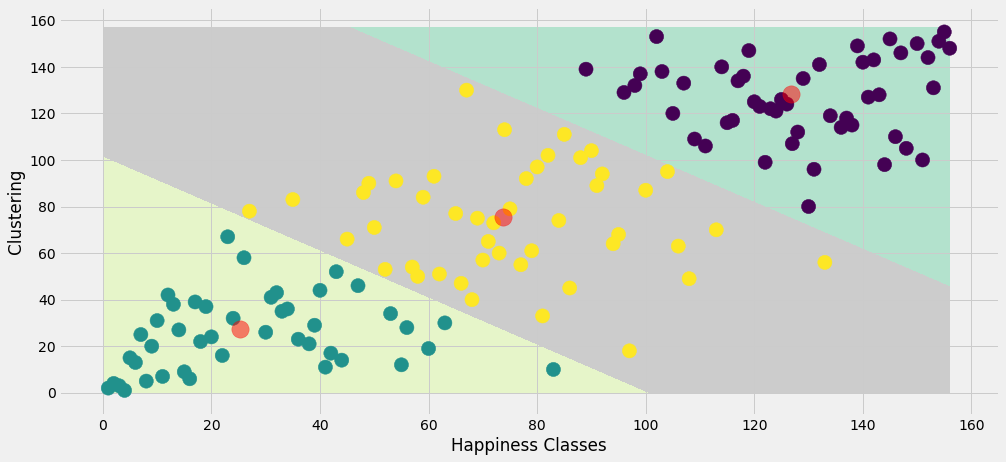

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()

plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Ladder' ,y = 'Social support' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Clustering') , plt.xlabel('Happiness Classes')
plt.show()

### T-test and Variance of Model

#### Removing predictors with P > 0.05 > |t| and removing predictors with VIF > 5.

Positive effect

In [ ]:
m = df[['Positive affect', 'Social support', 'Freedom','Healthy life\nexpectancy']]
y = df['Score']
model = sm.OLS(y,m).fit()
predictions = model.predict(m)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ladder   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     358.4
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.36e-85
Time:                        18:29:54   Log-Likelihood:                -612.02
No. Observations:                 140   AIC:                             1240.
Df Residuals:                     132   BIC:                             1264.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Positive affect             0.1383      0.052      2.651      0.009       0.035       0.242
Negative affect            -0.0949      0.050     -1.889      0.061      -0.194       0.004
Social support              0.3890      0.072      5.418      0.000       0.247       0.531
Freedom                     0.0700      0.059      1.180      0.240      -0.047       0.187
Corruption                  0.0162      0.040      0.402      0.688      -0.064       0.096
Generosity                 -0.0089      0.046     -0.194      0.846      -0.099       0.082
Log of GDP
per capita       0.2041      0.091      2.251      0.026       0.025       0.383
Healthy life
expectancy     0.3214      0.081      3.965      0.000       0.161       0.482
==============================================================================
Omnibus:                        3.201   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.437
Skew:                           0.068   Prob(JB):                        0.179
Kurtosis:                       3.756   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Negative effect

In [ ]:
n = df[['Negative affect', 'Social support', 'Freedom', 'Corruption',
         'Healthy life\nexpectancy']]
y = df['Score']
model = sm.OLS(y,n).fit()
predictions = model.predict(n)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ladder   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     412.6
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           6.57e-87
Time:                        18:29:54   Log-Likelihood:                -612.04
No. Observations:                 140   AIC:                             1238.
Df Residuals:                     133   BIC:                             1259.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Positive affect             0.1369      0.051      2.661      0.009       0.035       0.239
Negative affect            -0.0954      0.050     -1.908      0.059      -0.194       0.004
Social support              0.3889      0.072      5.437      0.000       0.247       0.530
Freedom                     0.0679      0.058      1.168      0.245      -0.047       0.183
Corruption                  0.0148      0.039      0.374      0.709      -0.063       0.093
Log of GDP
per capita       0.2019      0.090      2.253      0.026       0.025       0.379
Healthy life
expectancy     0.3204      0.081      3.976      0.000       0.161       0.480
==============================================================================
Omnibus:                        3.152   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.207   Jarque-Bera (JB):                3.359
Skew:                           0.067   Prob(JB):                        0.186
Kurtosis:                       3.747   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""